# Initialisation

on commence par importer les librairies dont on va avoir besoin :

In [1]:
import numpy as np #pour la gestion des tableaux
import matplotlib.pyplot as plt #pour l'affichage des graphiques
import random as rd #pour le calcul aléatoire
from math import * #pour l'utilisation de quelques fonction mathématique au besoin

ensuite on va initialiser chacune des constantes necéssaire pour l'algorithme :

In [2]:
d=0.2
q=0.8
p=0.5
Sm=0.5
h=p*Sm
k=p/q*Sm
b=2*d/q
l=0.2
Rm=7
me=0.02
ml=0.001

on va également initialiser les 4 paramètres ayant besoin de conditions initiales :

In [3]:
c0,s0,e0,l0=0,Sm,1,0.2

ensuite on va déclarer quelques méthodes selon les besoins de l'algorithme:

In [4]:
#cette fonction permet de simuler une loi de poisson en fonction de l
def poisson(l):
  k=0.0
  p=1.0
  lim=exp(-l)
  while(p>lim):
    k+=1
    p*=rd.random()
  return k-1

#cette fonction permet de determiner la valeur de E en fonction de t
def valE(t):
  return e0-t*me

#cette fonction permet de determiner la valeur de A en fonction de la valeur de V et d'un résultat de la loi de poisson
def valA(V,L):
  #return q*V
  return q*(V+L/Rm*(1-V))
  #return q*(V+(Rm-L)*L/Rm*(1-V)

# Simulation

on va commencer par simuler les valeurs de L (L étant les résultats ed la loi de poisson) et de E puisque ces derniers ne dépendent que du temps

In [5]:
n=200 #nombre de semaines simulée
L=np.array([poisson(l0+i*ml) for i in range(n)]) #calcul de la loi de poisson
E=np.array([valE(i) for i in range(n)]) #calcul du paramètre E

ensuite on initialise les vecteurs C,S,V,A puis on calcule chaque itération avec une boucle

In [6]:
C=np.array([c0 for i in range(n)])
S=np.array([s0 for i in range(n)])
V=np.array([0.0 for i in range(n)])
A=np.array([0.0 for i in range(n)])

for i in range(1,n):
    V[i]=min(1,max(C[i-1]-S[i-1]-E[i-1],0))
    A[i]=valA(V[i],L[i-1])
    C[i]=(1-d)*C[i-1]+b*min(1,1-C[i-1])*A[i]
    S[i]=S[i-1]+p*max(0,Sm-S[i-1])-h*C[i-1]-k*A[i]

V[-1]=min(1,max(C[-1]-S[-1]-E[-1],0))
A[-1]=q*(V[-1]+L[-1]/Rm*(1-V[-1]))

# Affichage

pour finir il ne reste plus qu'à afficher les résultats dans un graphique

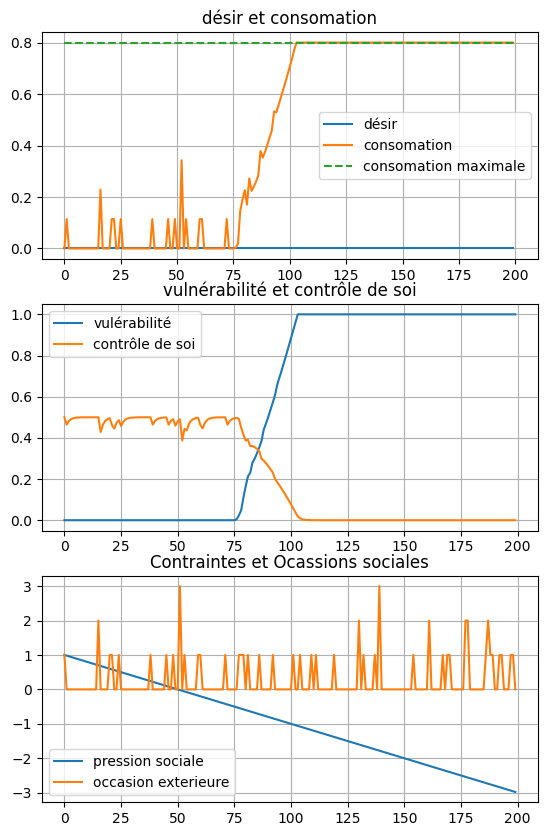

In [10]:
fig,[ax1,ax2,ax3]=plt.subplots(3)
fig.set_figheight(10)
ax1.plot(C)
ax1.plot(A)
ax1.plot([0,n],[q,q],linestyle='dashed')
ax2.plot(V)
ax2.plot(S)
ax3.plot(E)
ax3.plot(L)

ax1.grid()
ax2.grid()
ax3.grid()

ax1.set_title("désir et consomation")
ax2.set_title("vulnérabilité et contrôle de soi")
ax3.set_title("Contraintes et Ocassions sociales")

ax1.legend(["désir","consomation","consomation maximale"])
ax2.legend(["vulérabilité","contrôle de soi"])
ax3.legend(["pression sociale","occasion exterieure"])

plt.show()